# Bias-Variance Tradeoff


**Bias** is a representation of how different the prediction is from the actual value. **Variance**, on the other hand, is the extent to which the prediction is sensitive to the changes in input. As shown in the figure below, for the plot with high bias, low variance, the model is simple, and the fit of the model has been assumed to be linear. In this case, the train and test error are high and with increase in data points, bias remains unchanged. Increasing the features or the polynomial degree would reduce the model bias and reduce the simplicity of the model.<br>

On the other hand, the figure with high variance and low bias is overfitting the model and the curve passes through every single point, making it very complex. In this case, the training error is almost 0 and the test error is very high. Increasing the number of data points would reduce the model error. Reducing the features or regularization would reduce the varinace.<br>

**Bias-Variance Tradeoff** is the way to prevent the model from underfitting(high bias) as well as overfitting(high variance) the data. As bias reduces in an underfit model, the variance increases, and vice versa. The optimal model as shown in the second figure below would result from an intermediate bias and variance, or the bias-variance tradeoff.

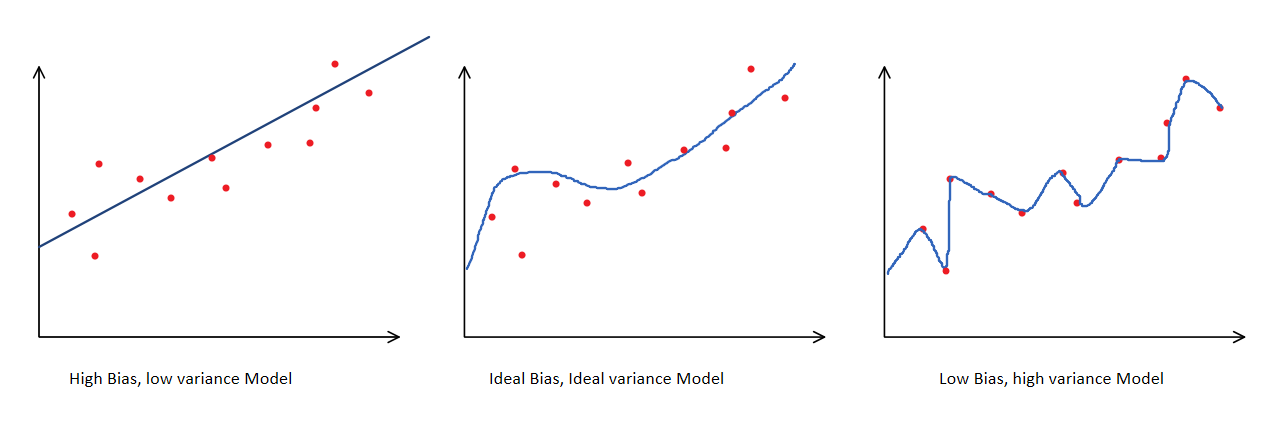

***


# Bias-Variance exploration 

**We want to build a model that can predict y for unknown inputs x.**

## Fitting polynomial models of degrees 2, 4, 7 to the training data. 


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [8]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
# x_all = np.linspace(-10,10,101).reshape(-1,1)
x_all = np.linspace(-5,5,101).reshape(-1,1)

lrp = LinearRegression()

degree = [2,4,7]

## Plotting the data and calculating MSEs

In [9]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all),
  # and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE
  fig, ax = plt.subplots(1,2, sharex= False, sharey=False)
  # ax[0].get_shared_x_axes().join(ax[0], ax[1])
  fig.set_size_inches(30, 10,  forward=True)

  ax[0].scatter(x_train, y_train,
                marker = "*", s = 15, c = "orange")
  
  ax[0].scatter(x_test, y_test,
                marker = "*", s = 15, c = "blue")
  
  train_mse = np.array([0.0]*3)
  test_mse = np.array([0.0]*3)
  all_mse = np.array([0.0]*3)
  
  for i in range(len(degree)):
    x_train_mod = np.vander(np.squeeze(x_train),N= degree[i]+1)
    x_test_mod = np.vander(np.squeeze(x_test),N= degree[i]+1)
    x_all_mod = np.vander(np.squeeze(x_all),N= degree[i]+1)

    model = lrp.fit(x_train_mod, y_train)
    y_pred_train = model.predict(x_train_mod)
    y_pred_test = model.predict(x_test_mod)
    y_pred_all = model.predict(x_all_mod)

    train_mse[i] = mean_squared_error(y_true = y_train, y_pred = y_pred_train)
    test_mse[i] = mean_squared_error(y_true = y_test, y_pred = y_pred_test)
    print('\nFor model with Degree:', degree[i])
    print('\n\tTrain MSE: ', train_mse[i])
    print('\n\tTest MSE: ', test_mse[i])

    tmp_x_train, y_pred_train = list(zip(*sorted(list(map(tuple, zip(x_train,y_pred_train))), key = lambda x: x[0])))
    tmp_x_test, y_pred_test = list(zip(*sorted(list(map(tuple, zip(x_test,y_pred_test))), key = lambda x: x[0])))
    tmp_x_all, y_pred_all = list(zip(*sorted(list(map(tuple, zip(x_all,y_pred_all))), key = lambda x: x[0])))

    ax[0].plot(tmp_x_test, y_pred_test)
    # ax[1].set_title("Test Data")
    # ax[1].legend(degree)

    # ax[0].plot(tmp_x_train, y_pred_train)
    ax[0].set_title("Train-Test Datapoints & Test Curves")
    ax[0].legend(["Polynomial Degree {}".format(x) for x in degree]+["Training Data","Test Data"])
    
    ax[1].plot(tmp_x_all, y_pred_all)
    ax[1].set_title("Curves on x_all")
    ax[1].legend(["Polynomial Degree {}".format(x) for x in degree])
    
  plt.show()
  return np.sqrt(train_mse), np.sqrt(test_mse)




For model with Degree: 2

	Train MSE:  247.2967979737153

	Test MSE:  320.0640834697786

For model with Degree: 4

	Train MSE:  31.720018057290062

	Test MSE:  31.292082886606693

For model with Degree: 7

	Train MSE:  30.677193592109724

	Test MSE:  33.41069407769016


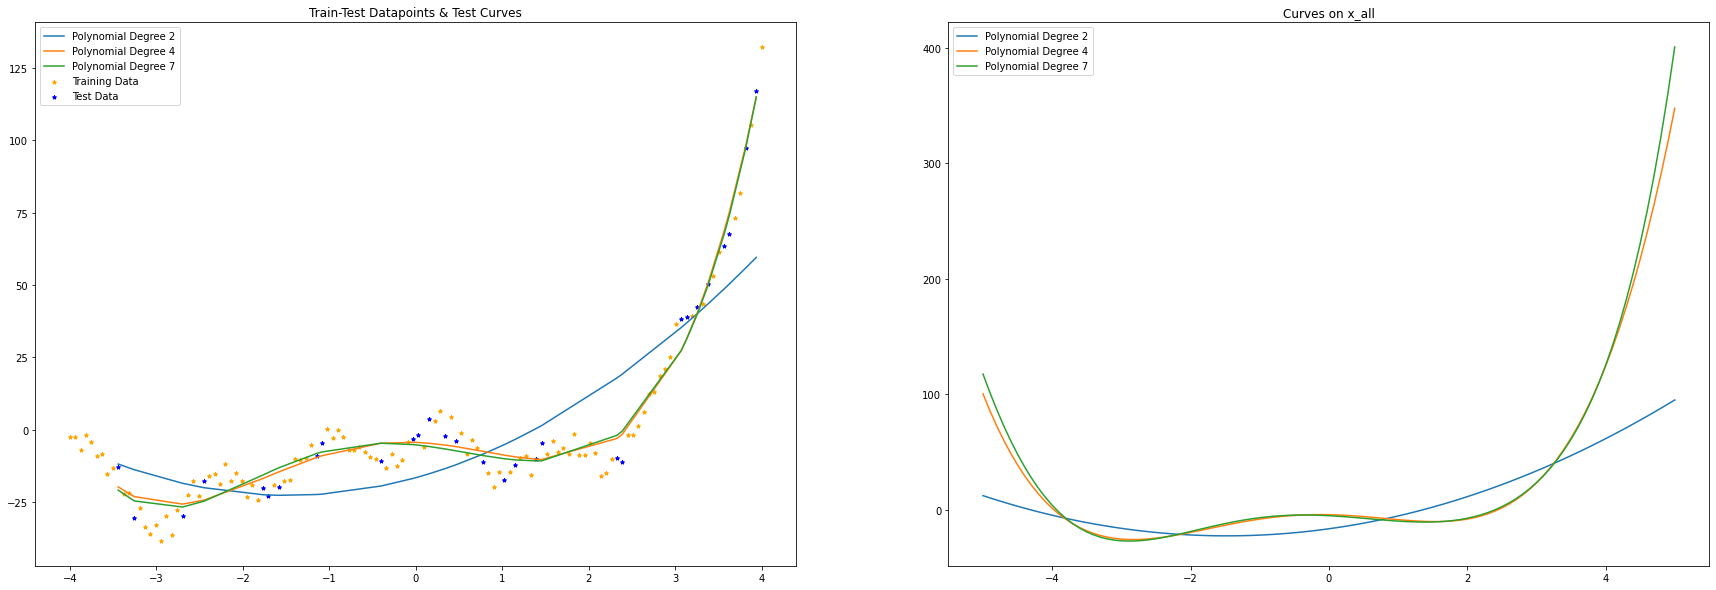

In [10]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

## Inference
The **degree 2** curve represents a model that is simple, having relatively high bias and low variance, changing direction atmost once. However, as shown by the scatter plot of data points, the degree 2 curve is not a good fit and has **underfit** the data. <br>

The **degree 7** curve represents a more complicated model, having high variance and low bias, changing direction atmost 6 times. Based on the curves shown on the plot, it fits the data better than the second degree polynomial. But, this **overfits** the data<br>

The **degree 4** curve has an intermediate bias and variance. As per the graph, this curve is very close to the graoh for degree 7, and can change its direction atmost 3 times, 
creating a more smoother curve than the degree 7 graph.

## Study the effects of the training data size on the bias and variance

20% data

For model with Degree: 2

	Train MSE:  161.17147378830043

	Test MSE:  402.3231269099287

For model with Degree: 4

	Train MSE:  35.11511313912978

	Test MSE:  38.340744983442825

For model with Degree: 7

	Train MSE:  22.543946691373257

	Test MSE:  135.20764526756494


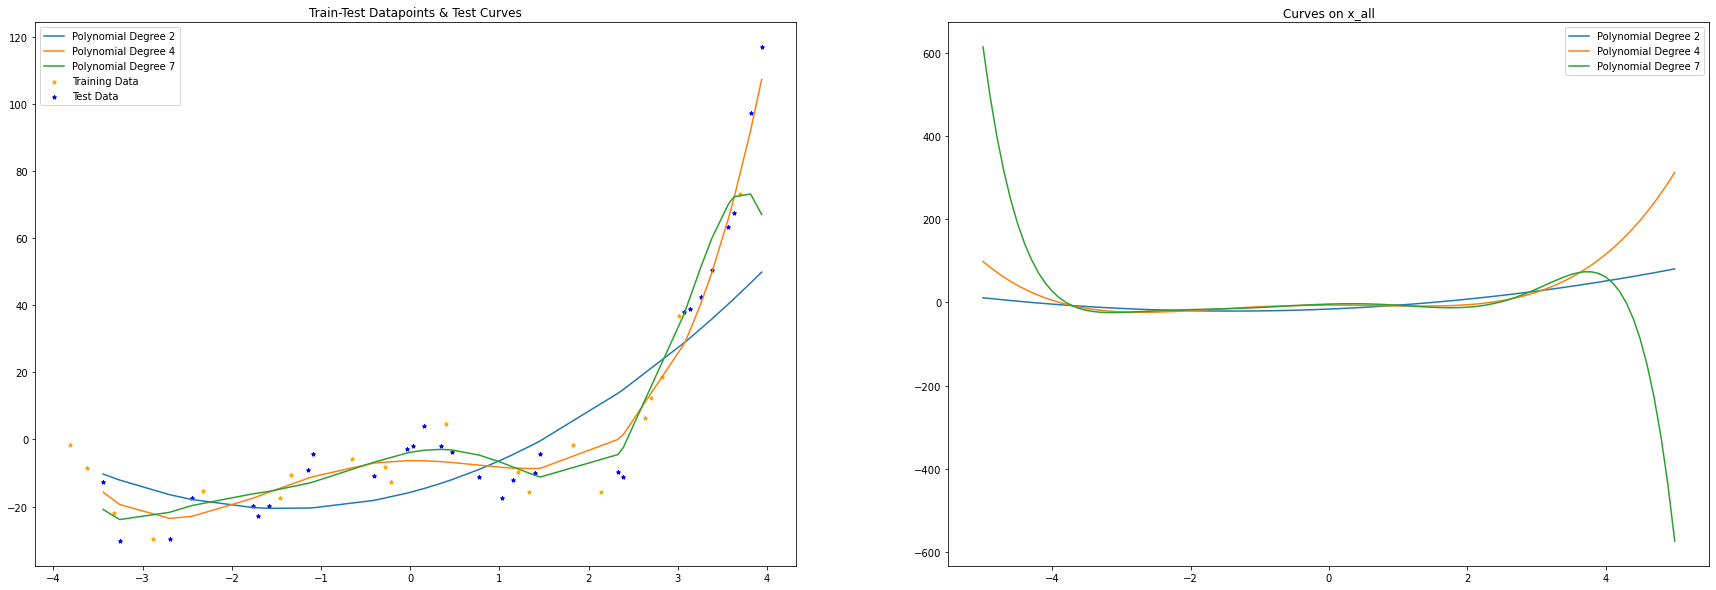

40% data

For model with Degree: 2

	Train MSE:  150.33251286085704

	Test MSE:  405.8051669616576

For model with Degree: 4

	Train MSE:  31.6245296464469

	Test MSE:  33.16428295918743

For model with Degree: 7

	Train MSE:  25.492718751653644

	Test MSE:  61.23741884551061


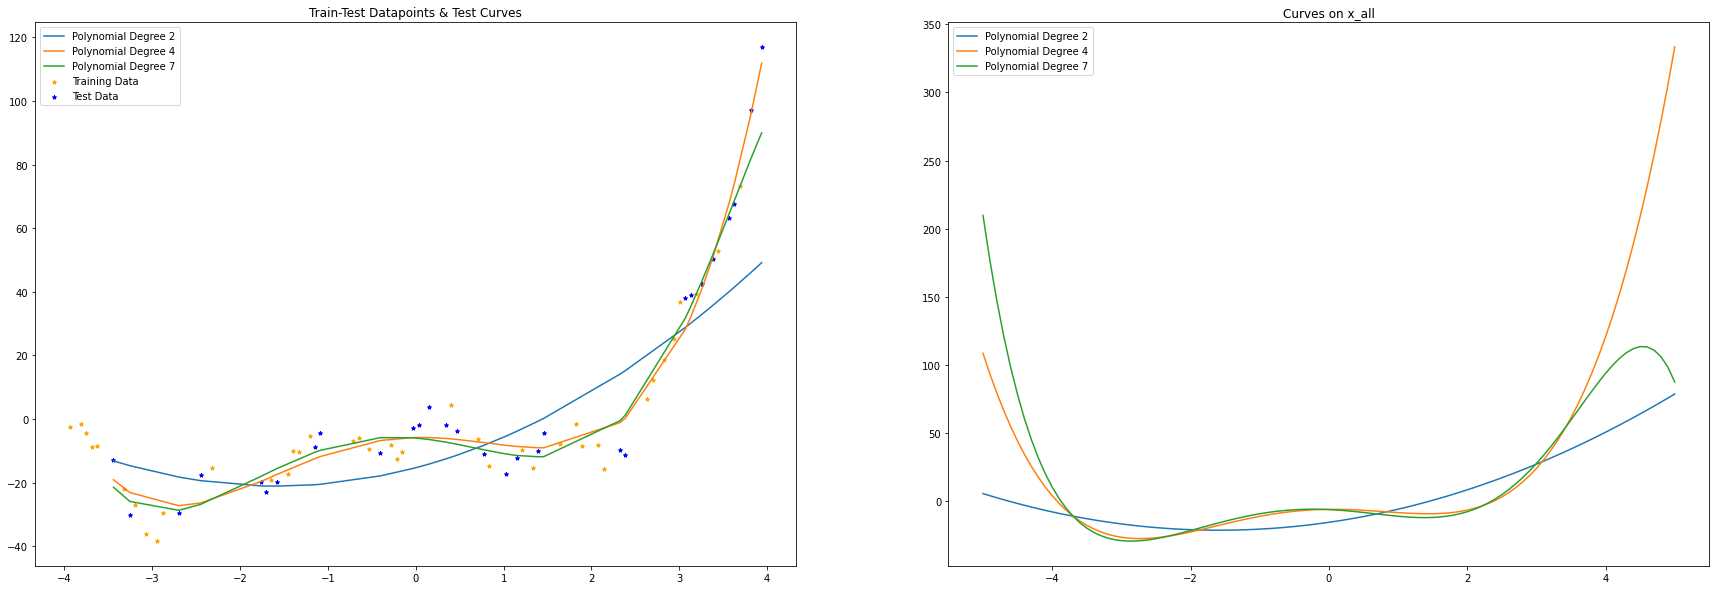

60% data

For model with Degree: 2

	Train MSE:  150.08383759141728

	Test MSE:  403.2513784833407

For model with Degree: 4

	Train MSE:  29.1928057399479

	Test MSE:  31.781415416196726

For model with Degree: 7

	Train MSE:  26.09908864245441

	Test MSE:  60.166672376645124


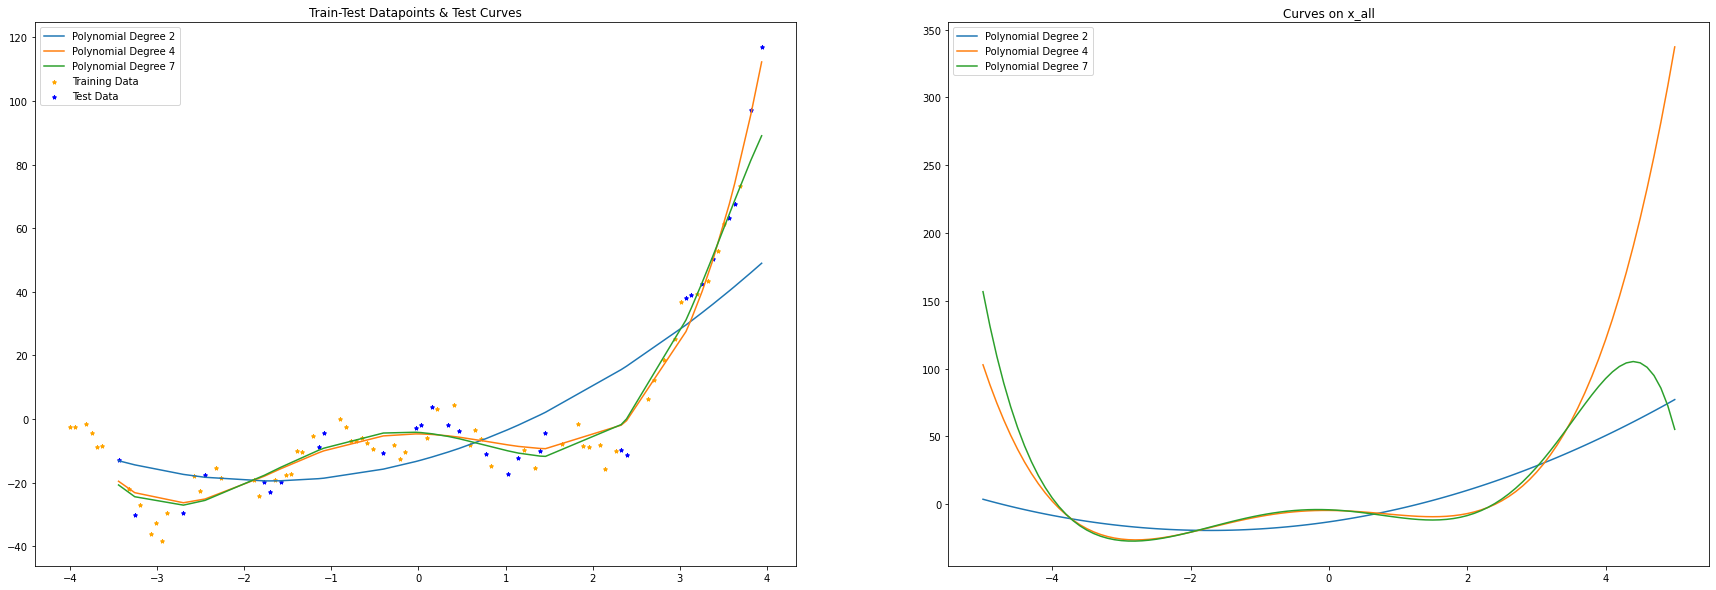

80% data

For model with Degree: 2

	Train MSE:  168.1188246150281

	Test MSE:  407.59369688184705

For model with Degree: 4

	Train MSE:  29.305108483323444

	Test MSE:  32.5181068687426

For model with Degree: 7

	Train MSE:  26.549129596283638

	Test MSE:  48.076935297107646


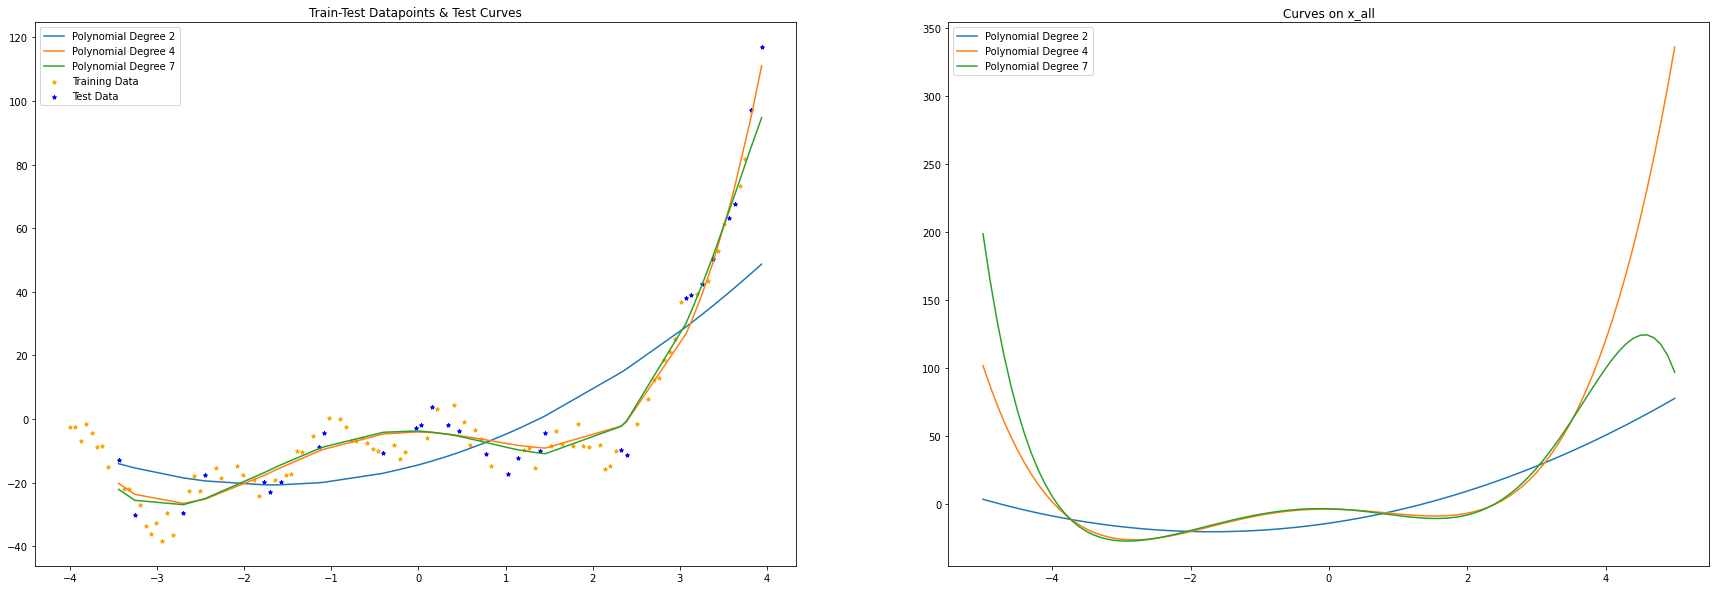

100% data

For model with Degree: 2

	Train MSE:  247.2967979737153

	Test MSE:  320.0640834697786

For model with Degree: 4

	Train MSE:  31.720018057290062

	Test MSE:  31.292082886606693

For model with Degree: 7

	Train MSE:  30.677193592109724

	Test MSE:  33.41069407769016


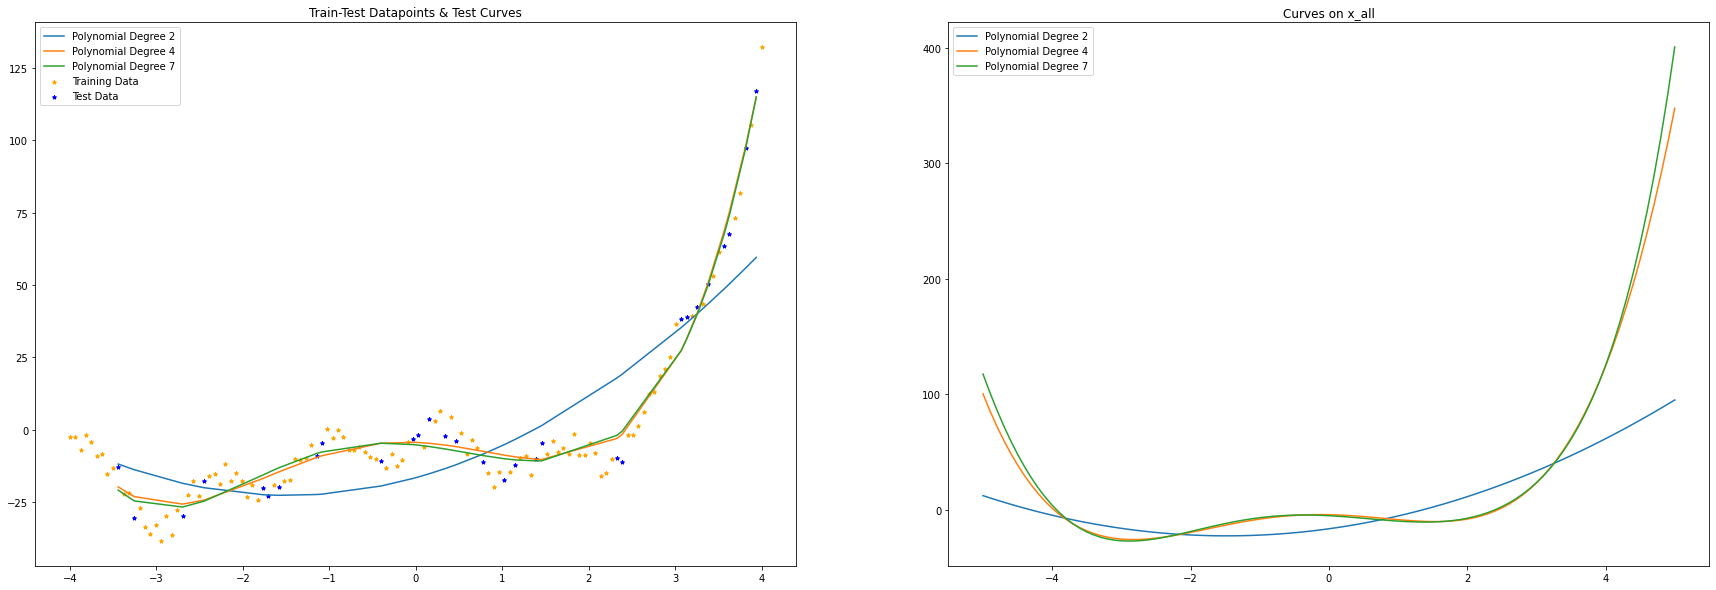

In [5]:
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

In [6]:
size = [20,40,60,80,100]

train_mse = pd.DataFrame(np.array([np.log(train_rmses_20), np.log(train_rmses_40), np.log(train_rmses_60), np.log(train_rmses_80), np.log(train_rmses_100)]))
train_mse.columns = degree
train_mse.index = size

test_mse = pd.DataFrame(np.array([np.log(test_rmses_20), np.log(test_rmses_40), np.log(test_rmses_60), np.log(test_rmses_80), np.log(test_rmses_100)]))
test_mse.columns = degree
test_mse.index = size

[]

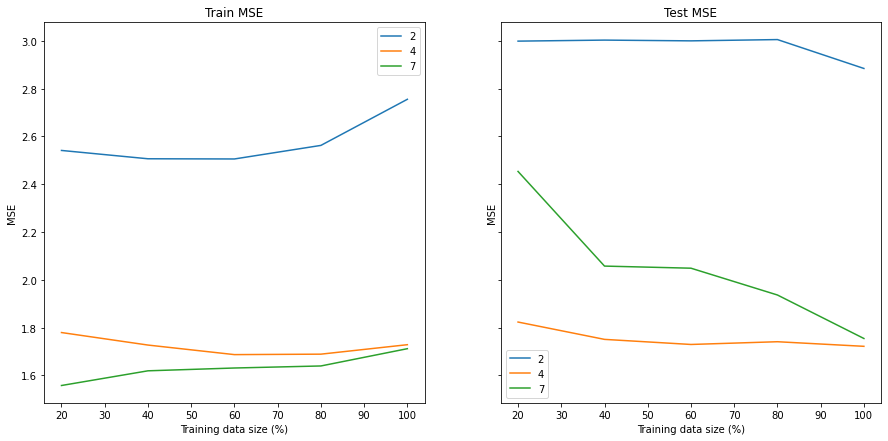

In [7]:
fig, ax = plt.subplots(1,2, sharex=True, sharey=True)
fig.set_size_inches(15, 7,  forward=True)

ax[0].plot(train_mse)
ax[0].legend(train_mse.columns)
ax[0].set_title("Train MSE")
ax[0].set_xlabel("Training data size (%)")
ax[0].set_ylabel("MSE")

ax[1].plot(test_mse)
ax[1].legend(test_mse.columns)
ax[1].set_title("Test MSE")
ax[1].set_xlabel("Training data size (%)")
ax[1].set_ylabel("MSE")

plt.plot()

# Inference

Based on the graphs above, we observe the following:

### Degree 2 polynomial
- The **Degree 2** polynomial model has a high bias. Therefore, it fits the datapoints quickly and is reelatively stable. This can be observed from the fact that the MSE is fairly constant when the model trains against 20%, 40% or even 70% of the data.
- The model exhibits a _slight decrease_ in MSE values initially which can probably be attributed to decreasing variance as training size increases.
- Overall the model has a very high MSE values, which is probably the cost of a over-simplified high-bias second degree model.

### Degree 4 polynomial

- The **Degree 4** polynomial model performs reasonably well. in terms of stablity. While this model has a has a lower bias than its predecessor, it is still not "too-complex". The model's training MSE keeps decreasing gradually as the training size increases.

### Degree 7 polynomial

- The **Degree 7** polynomial has a very low bias making the model too complex. It does not fit the data well and the given corpus of data is not enough for it to learn from.
that's why its train MSE is increasing.


***
***